In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['font.size'] = 14

In [4]:
from pyMKL import mkl_set_num_threads

In [5]:
mkl_set_num_threads(1)

In [6]:
df_skytem = pd.read_csv("../skytem_xyz/from_agf/skytem-final.csv")
df_skytem = df_skytem.drop(columns=[df_skytem.keys()[0]])

FileNotFoundError: [Errno 2] File b'../skytem_xyz/from_agf/skytem-final.csv' does not exist: b'../skytem_xyz/from_agf/skytem-final.csv'

In [7]:
i_start_hm = 10
i_start_lm = 10

lm_inds = np.array(['DBDT_Ch1' in key.split('GT') for key in df_skytem.keys()], dtype=bool)
hm_inds = np.array(['DBDT_Ch2' in key.split('GT') for key in df_skytem.keys()], dtype=bool)
lm_header = (df_skytem.keys()[lm_inds])[i_start_lm:]
hm_header = (df_skytem.keys()[hm_inds])[i_start_hm:]

NameError: name 'df_skytem' is not defined

In [7]:
df_resistivity = pd.read_csv("../skytem_xyz/from_agf/skytem-resistivity-final.csv")
df_resistivity = df_resistivity.drop(columns=[df_resistivity.keys()[0]])
thk_ind = (np.array([key.split('_')[0] for key in df_resistivity.keys()]) == 'THK')
thk_ind = np.arange(thk_ind.size)[thk_ind]
thk_ind_304 = thk_ind[(np.array([key.split('_')[1] for key in df_resistivity.keys()[thk_ind]]) == '304')]
thk_ind_312 = thk_ind[(np.array([key.split('_')[1] for key in df_resistivity.keys()[thk_ind]]) == '312')]
hz_312 = df_resistivity[df_resistivity.keys()[thk_ind_312]]
hz_304 = df_resistivity[df_resistivity.keys()[thk_ind_304]]
inds_312 = df_resistivity.SkyTEM_TYPE.values == 312.
inds_304 = df_resistivity.SkyTEM_TYPE.values == 304.
# SkyTEM_TYPE = np.zeros(hz_312.shape[0])
# SkyTEM_TYPE[inds_312] = 312.
# SkyTEM_TYPE[inds_304] = 304.
# df_resistivity['SkyTEM_TYPE'] = SkyTEM_TYPE
# df_resistivity.to_csv("../skytem_xyz/from_agf/skytem-resistivity-final.csv")

In [8]:
xy = df_skytem[['UTMX', 'UTMY']].values

In [9]:
Line = df_skytem.LINE_NO.values

In [10]:
line = np.unique(Line)

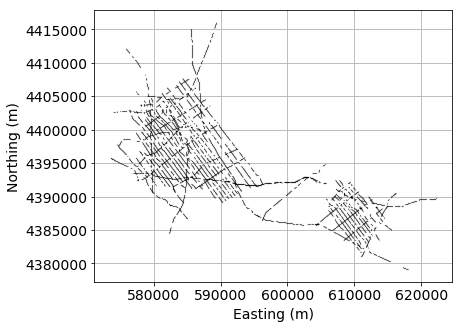

In [11]:
fig = plt.figure(figsize=(10, 5))
# ind_line = (Line == 710601.) | (Line == 730301.)
# ind_line = Line == line[35]
plt.plot(xy[:,0], xy[:,1], 'k.', ms=0.1)
# plt.plot(xy[ind_line,0], xy[ind_line,1], 'ro', ms=4)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.gca().set_aspect(1)

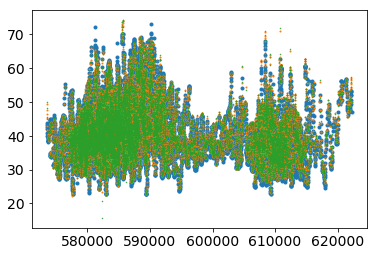

In [12]:
plt.plot(xy[:,0], df_resistivity.INVALT.values[:], '.')
plt.plot(xy[:,0], df_resistivity.ALT.values[:], '.', ms=2)
plt.plot(xy[:,0], df_skytem.TX_ALTITUDE.values[:], '.', ms=1)

In [13]:
area = 342
unit_conversion = 1e-12

i_start_hm = 10
i_start_lm = 10

waveform_hm_312 = np.loadtxt("./known_info/waveform_hm_312.txt")
waveform_lm_312 = np.loadtxt("./known_info/waveform_lm_312.txt")
time_input_currents_HM_312 = waveform_hm_312[:,0] 
input_currents_HM_312 = waveform_hm_312[:,1]
time_input_currents_LM_312 = waveform_lm_312[:,0] 
input_currents_LM_312 = waveform_lm_312[:,1]

time_gates = np.loadtxt("known_info/time_gates")
GateTimeShift=-2.09E-06
MeaTimeDelay=0.000E+00
NoGates=28
t0_lm_312 = waveform_lm_312[:,0].max()
times_lm_312 = (time_gates[:NoGates,0] + GateTimeShift + MeaTimeDelay)[i_start_lm:] - t0_lm_312

GateTimeShift=-1.5E-06
MeaTimeDelay=3.500E-04
NoGates=37
t0_hm_312 = waveform_hm_312[:,0].max()
times_hm_312 = (time_gates[:NoGates,0] + GateTimeShift + MeaTimeDelay)[i_start_hm:] - t0_hm_312    

In [14]:
area = 342
unit_conversion = 1e-12

i_start_hm = 10
i_start_lm = 10

waveform_hm_304 = np.loadtxt("./known_info/waveform_hm_304.txt")
waveform_lm_304 = np.loadtxt("./known_info/waveform_lm_304.txt")
time_input_currents_HM_304 = waveform_hm_304[:,0] 
input_currents_HM_304 = waveform_hm_304[:,1]
time_input_currents_LM_304 = waveform_lm_304[:,0] 
input_currents_LM_304 = waveform_lm_304[:,1]

time_gates = np.loadtxt("known_info/time_gates")
GateTimeShift=-2.09E-06
MeaTimeDelay=0.000E+00
NoGates=28
t0_lm_304 = waveform_lm_304[:,0].max()
times_lm_304 = (time_gates[:NoGates,0] + GateTimeShift + MeaTimeDelay)[i_start_lm:] - t0_lm_304

GateTimeShift=-1.5E-06
MeaTimeDelay=6.000E-05
NoGates=37
t0_hm_304 = waveform_hm_304[:,0].max()
times_hm_304 = (time_gates[:NoGates,0] + GateTimeShift + MeaTimeDelay)[i_start_hm:] - t0_hm_304    

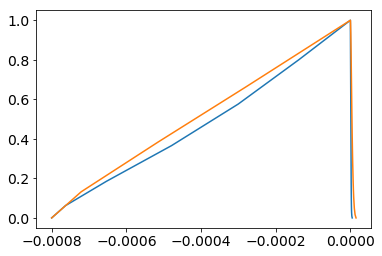

In [15]:
plt.plot(time_input_currents_LM_304, input_currents_LM_304)
plt.plot(time_input_currents_LM_312, input_currents_LM_312)

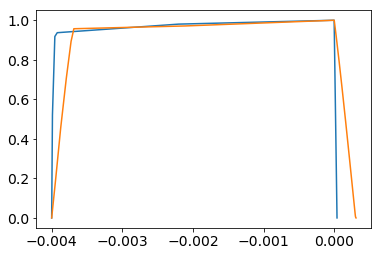

In [16]:
plt.plot(time_input_currents_HM_304, input_currents_HM_304)
plt.plot(time_input_currents_HM_312, input_currents_HM_312)

In [1]:
from SimPEG import (
    Regularization, Directives, Inversion, 
    InvProblem, Optimization, DataMisfit, Utils, Maps
)
from simpegEM1D import (
    GlobalEM1DProblemTD, GlobalEM1DSurveyTD, 
    get_vertical_discretization_time, EM1DSurveyTD,
    get_2d_mesh, LateralConstraint, 
)
from pymatsolver import PardisoSolver
hz = np.unique(hz_312.values[inds_312,:])* 0.3048
# hz = np.unique(hz_304.values[inds_304,:])* 0.3048
n_sounding = xy[:,:].shape[0]
mesh = get_2d_mesh(n_sounding, hz)

NameError: name 'np' is not defined

In [18]:
skytem_type = df_resistivity.SkyTEM_TYPE.values[:]

In [19]:
dem = df_resistivity.DEM_M.values[:]
height = df_resistivity.INVALT.values[:]
rx_locations = np.c_[xy[:,:], height+dem+2.]
src_locations = np.c_[xy[:,:], height+dem]
topo = np.c_[xy[:,:], dem]

In [20]:
time = []
time_dual_moment = []
input_currents = []
time_input_currents = []
input_currents_dual_moment = []
time_input_currents_dual_moment = []

for i_sounding in range(n_sounding):
    if skytem_type[i_sounding] == 312.:
        time.append(times_hm_312)
        time_dual_moment.append(times_lm_312)
        time_input_currents.append(time_input_currents_HM_312)
        input_currents.append(input_currents_HM_312)
        time_input_currents_dual_moment.append(time_input_currents_LM_312)
        input_currents_dual_moment.append(input_currents_LM_312)        
    else:
        time.append(times_hm_304)
        time_dual_moment.append(times_lm_304)
        time_input_currents.append(time_input_currents_HM_304)
        input_currents.append(input_currents_HM_304)
        time_input_currents_dual_moment.append(time_input_currents_LM_304)
        input_currents_dual_moment.append(input_currents_LM_304)        

In [21]:
mapping = Maps.ExpMap(mesh)

survey = GlobalEM1DSurveyTD(
    rx_locations = rx_locations,
    src_locations = src_locations,    
    topo = topo,
    time = time,
    time_dual_moment = time_dual_moment,
    src_type = np.array(["VMD"], dtype=str).repeat(n_sounding),
    rx_type = np.array(["dBzdt"], dtype=str).repeat(n_sounding),    
    offset = np.array([13.25], dtype=float).repeat(n_sounding).reshape([-1,1]),    
    wave_type = np.array(["general"], dtype=str).repeat(n_sounding),    
    field_type = np.array(["secondary"], dtype=str).repeat(n_sounding),    
    input_currents=input_currents,
    time_input_currents=time_input_currents,
    base_frequency = np.array([30.]).repeat(n_sounding),
    input_currents_dual_moment=input_currents_dual_moment,
    time_input_currents_dual_moment=time_input_currents_dual_moment,
    base_frequency_dual_moment = np.array([210.]).repeat(n_sounding),
    moment_type=np.array(["dual"], dtype=str).repeat(n_sounding)
)

prob = GlobalEM1DProblemTD(
    [], sigmaMap=mapping, hz=hz, parallel=True, n_cpu=10,
    Solver=PardisoSolver
)
prob.pair(survey)

>> Set parameters
>> Use multiprocessing for parallelization
>> n_cpu: 10


## Load reference and bounds

In [22]:
import dill
well_data = dill.load(open("./all-soundings/well-constraints-for-all.pik", "rb"))

In [23]:
m0 = np.ones(mesh.nC) * np.log(1./10.)

In [24]:
sigma_min = Utils.mkvc(well_data['min'])
sigma_max = Utils.mkvc(well_data['max'])
m_lower = np.log(sigma_min)
m_upper = np.log(sigma_max)
m_lower[np.isnan(sigma_min)] = -np.Inf
m_upper[np.isnan(sigma_max)] = np.Inf
m_upper[sigma_min==sigma_max] = np.Inf
# m_lower[np.isnan(sigma_min) | (mesh.gridCC[:,0]<200.)] = -np.Inf
# m_upper[np.isnan(sigma_min) | (mesh.gridCC[:,0]<200.)] = +np.Inf

In [25]:
data_hm = df_skytem[hm_header].values[:,:]
data_lm = df_skytem[lm_header].values[:,:]
dobs = np.hstack((data_hm, data_lm)).flatten() * unit_conversion

In [26]:
inds_312 = skytem_type==312.
inds_304 = skytem_type==304.

In [27]:
floor_hm = 0.
floor_lm = 0.
std = 0.05
data_hm[np.isnan(data_hm)] = 9999.
data_lm[np.isnan(data_lm)] = 9999.
dobs = np.hstack((data_hm/area, data_lm/area)).flatten()
uncert = np.hstack((abs(data_hm/area)*std + floor_hm, abs(data_lm/area)*std + floor_lm)).flatten()
survey.dobs = -dobs.copy() 
inactive_inds = dobs==9999./area
uncert[inactive_inds] = np.Inf

In [28]:
1-(dobs==9999./area).sum()/ dobs.size

0.8031443757788459

In [ ]:
mesh = get_2d_mesh(n_sounding, hz)
m0 = np.ones(mesh.nC) * np.log(1./10.)
regmap = Maps.IdentityMap(mesh)
# mapping is required ... for IRLS
reg = LateralConstraint(
    mesh, mapping=regmap,
    alpha_s = 1e-2,
    alpha_x = 10.,
    alpha_y = 1.,    
)
reg.get_grad_horizontal(xy[:,:], hz, dim=3, use_cell_weights=True, minimum_distance=1000.)

np.random.seed(1)
dmisfit = DataMisfit.l2_DataMisfit(survey)
dmisfit.W = 1./uncert
p = 0
qx, qz = 1., 1.
reg.norms = np.c_[p, qx, qz, 0.]
IRLS = Directives.Update_IRLS(
    maxIRLSiter=5, minGNiter=1, fix_Jmatrix=True,
    betaSearch=False
)
opt = Optimization.ProjectedGNCG(maxIter = 30, maxIterCG=20)
# opt.upper = m_upper
# opt.lower = m_lower
invProb = InvProblem.BaseInvProblem(dmisfit, reg, opt)
beta = Directives.BetaSchedule(coolingFactor=2, coolingRate=1)
betaest = Directives.BetaEstimate_ByEig(beta0_ratio=1.)
target = Directives.TargetMisfit(chifact=0.84)
sense = Directives.UpdateSensitivityWeights()
save_model = Directives.SaveOutputDictEveryIteration(directory="./l2-m0-10ohmm-smooth/")
inv = Inversion.BaseInversion(invProb, directiveList=[beta, betaest, target, save_model, sense])
prob.counter = opt.counter = Utils.Counter()
opt.LSshorten = 0.5
opt.remember('xc')
mopt = inv.run(m0)

SimPEG.DataMisfit.l2_DataMisfit assigning default std of 5%
SimPEG.DataMisfit.l2_DataMisfit assigning default eps of 1e-5 * ||dobs||
SimPEG.InvProblem will set Regularization.mref to m0.

    SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
    ***Done using same Solver and solverOpts as the problem***
SimPEG.SaveOutputDictEveryIteration will save your inversion progress as dictionary: '###-InversionModel-2019-07-31-17-57.npz'
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  4.60e+00  2.22e+08  0.00e+00  2.22e+08    1.57e+06      0              
   1  2.30e+00  2.94e+07  1.21e+03  2.94e+07    3.21e+05      0              
   2  1.15e+00  3.86e+06  3.64e+03  3.87e+06    7.05e+04      0   Skip BFGS  


(842.6948751056651, 18031.87202506636)

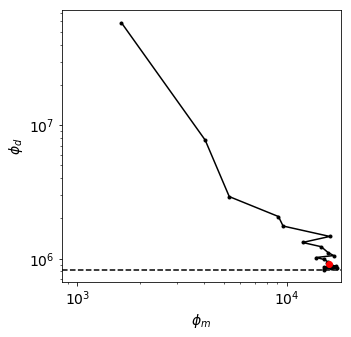

In [50]:
beta = np.array([save_model.outDict[ii]['beta'] for ii in save_model.outDict.keys()])
phi_m = np.array([save_model.outDict[ii]['phi_m'] for ii in save_model.outDict.keys()])
phi_d = np.array([save_model.outDict[ii]['phi_d'] for ii in save_model.outDict.keys()])

fig = plt.figure(figsize=(5,5))
iteration = 14
plt.plot(phi_m, phi_d*2, 'k.-')
plt.plot(phi_m[iteration], phi_d[iteration]*2, 'ro')
xlim = plt.xlim()
plt.plot(xlim, np.ones(2)*target.target*2, 'k--')
plt.xlabel("$\phi_m$")
plt.ylabel("$\phi_d$")
plt.xscale("log")
plt.yscale("log")
plt.xlim(xlim)

In [51]:
import dill
# dill.dump(save_model.outDict, open('./l2-m0-10ohmm-smooth/inversion-result.pik', 'wb'))
dill.dump(save_model.outDict, open('./l2-m0-10ohmm-smooth/inversion-result-sense.pik', 'wb'))
# dill.dump(save_model.outDict, open('./l2-m0-10ohmm-smooth/inversion-result-well-constraint.pik', 'wb'))

In [52]:
# save_model.outDict

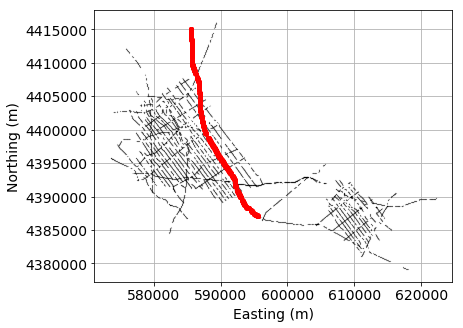

In [53]:
ii = np.argwhere(line == 710301)[0]
temp = np.unique(Line)
fig = plt.figure(figsize=(10, 5))
ind_line = Line == line[ii]
plt.plot(xy[:,0], xy[:,1], 'k.', ms=0.1)
plt.plot(xy[ind_line,0], xy[ind_line,1], 'ro', ms=4)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.gca().set_aspect(1)

In [47]:
from simpegEM1D import ModelIO

In [48]:
len(save_model.outDict)

23

(<matplotlib.collections.QuadMesh at 0x2acd69afc898>,
 <matplotlib.colorbar.Colorbar at 0x2acd87ee1390>)

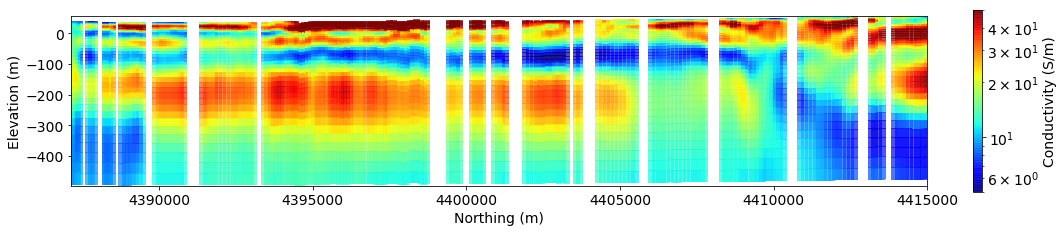

In [49]:
nskip = 5
IO = ModelIO(
    hz=hz,
    topography=topo[::nskip,:], 
    physical_property=1./np.exp(Utils.mkvc(save_model.outDict[23]['m'].reshape((hz.size, n_sounding), order='F')[:,::nskip])),
    line=Line[::nskip]
)
IO.plot_section(line_direction='y', scale='log', plot_type='pcolor', cmap='jet', aspect=10, clim=(5, 50), dx=100, i_line=ii)
# plt.ylim(-400, 200)

/home/sgkang09/.conda/envs/simpeg/lib/python3.6/site-packages/simpegEM1D-0.0.15-py3.6-linux-x86_64.egg/simpegEM1D/IO.py:55: UserWarning: code under construction - API might change in the future
  "code under construction - API might change in the future"


(<matplotlib.collections.QuadMesh at 0x2acd695e9be0>,
 <matplotlib.colorbar.Colorbar at 0x2acd69bed320>)

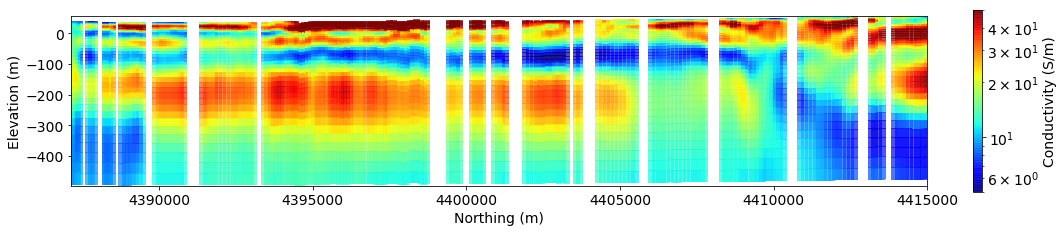

In [39]:
nskip = 5
IO = ModelIO(
    hz=hz,
    topography=topo[::nskip,:], 
    physical_property=1./np.exp(Utils.mkvc(save_model.outDict[23]['m'].reshape((hz.size, n_sounding), order='F')[:,::nskip])),
    line=Line[::nskip]
)
IO.plot_section(line_direction='y', scale='log', plot_type='pcolor', cmap='jet', aspect=10, clim=(5, 50), dx=100, i_line=ii)
# plt.ylim(-400, 200)

(-400, 200)

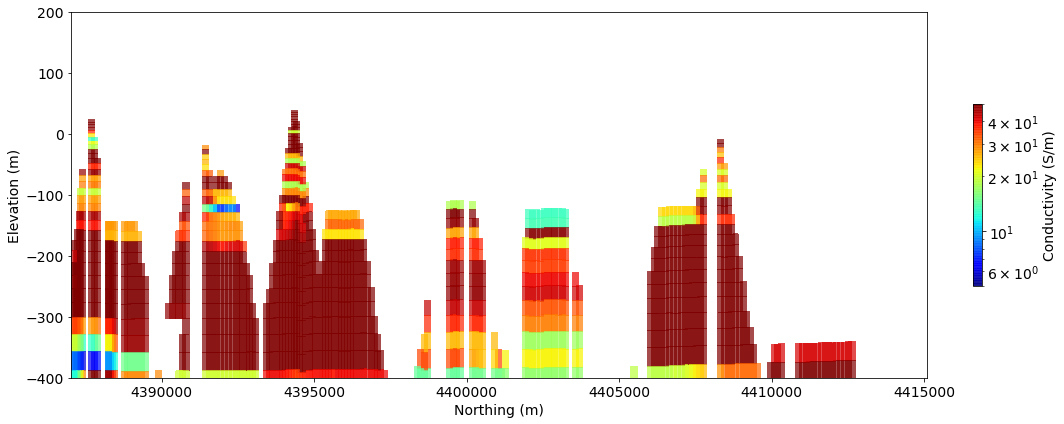

In [39]:
nskip = 5
IO = ModelIO(
    hz=hz,
    topography=topo[::nskip,:], 
    physical_property=1./np.exp(Utils.mkvc(m_lower.reshape((hz.size, n_sounding), order='F')[:,::nskip])),
    line=Line[::nskip]
)
IO.plot_section(line_direction='y', scale='log', plot_type='pcolor', cmap='jet', aspect=20, clim=(5, 50), dx=100, i_line=ii)
plt.ylim(-400, 200)

(-400, 200)

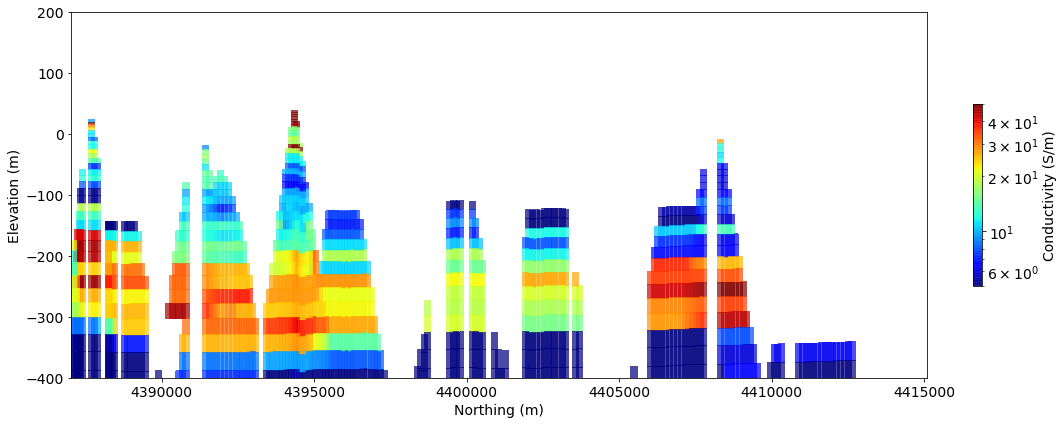

In [40]:
nskip = 5
IO = ModelIO(
    hz=hz,
    topography=topo[::nskip,:], 
    physical_property=1./np.exp(Utils.mkvc(m_upper.reshape((hz.size, n_sounding), order='F')[:,::nskip])),
    line=Line[::nskip]
)
IO.plot_section(line_direction='y', scale='log', plot_type='pcolor', cmap='jet', aspect=20, clim=(5, 50), dx=100, i_line=ii)
plt.ylim(-400, 200)

In [ ]:
# mesh = get_2d_mesh(n_sounding, hz)
# m0 = mopt.copy()
# mref = np.ones(mesh.nC) * np.log(1./13.720948725842954)
# regmap = Maps.IdentityMap(mesh)
# # mapping is required ... for IRLS
# reg = LateralConstraint(
#     mesh, mapping=regmap,
#     alpha_s = 1.,
#     alpha_x = 1.,
#     alpha_y = 1.,  
#     mref=mref
# )
# reg.get_grad_horizontal(xy[:,:], hz, dim=3, use_cell_weights=True, minimum_distance=1000.)

# np.random.seed(1)
# dmisfit = DataMisfit.l2_DataMisfit(survey)
# dmisfit.W = 1./uncert
# p = 0
# qx, qz = 2., 2.
# reg.norms = np.c_[p, qx, qz, 0.]
# IRLS = Directives.Update_IRLS(
#     maxIRLSiter=5, minGNiter=1, fix_Jmatrix=True,
#     betaSearch=False, 
#     chifact_start=2.
# )
# opt = Optimization.InexactGaussNewton(maxIter = 30)
# invProb = InvProblem.BaseInvProblem(dmisfit, reg, opt)
# beta = Directives.BetaSchedule(coolingFactor=2, coolingRate=1)
# betaest = Directives.BetaEstimate_ByEig(beta0_ratio=1e-3)
# target = Directives.TargetMisfit(chifact=0.84)
# save_model_irls = Directives.SaveOutputDictEveryIteration(directory="./l2-m0-10ohmm-smooth/")
# inv = Inversion.BaseInversion(invProb, directiveList=[betaest, save_model_irls])
# prob.counter = opt.counter = Utils.Counter()
# opt.LSshorten = 0.5
# opt.remember('xc')
# mopt_irls = inv.run(m0)